# Lecture 9/12 Visualization and Accuracy

## Reading: chapters 3, 4

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Harmonic Oscilator case study

In [10]:
from gen_data import get_data, fit

rasterized = True, lowwer resolution plots for just a pixel map of what huge ammounts of data look like

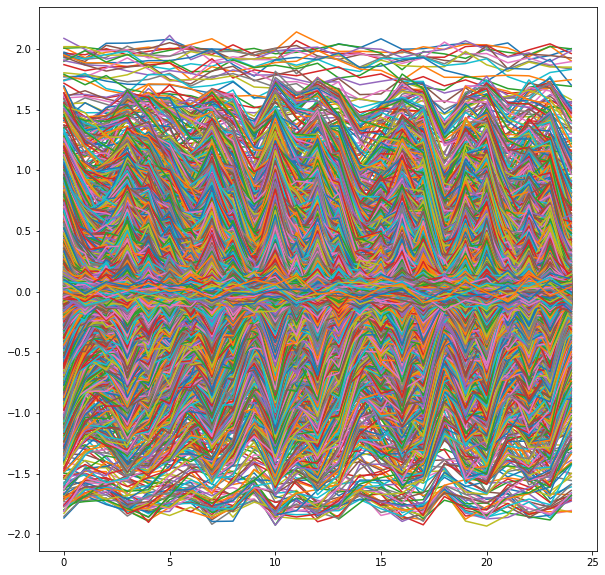

In [12]:
d = get_data()
plt.plot(d);

In [16]:
d = get_data()
d

<xarray.DataArray (control: 25, time: 4112)>
array([[ 1.97369701e+00,  2.01057197e+00,  2.00648372e+00, ...,
         8.25178886e-02,  1.01911614e-01,  9.92409847e-04],
       [ 1.92303835e+00,  1.92842426e+00,  2.01295694e+00, ...,
         6.94606607e-02, -1.62914385e-02, -6.77655524e-02],
       [ 2.04696992e+00,  1.97392840e+00,  1.99299277e+00, ...,
        -2.86347478e-02,  8.21037441e-02,  5.30538582e-02],
       ...,
       [ 1.91554462e+00,  1.93758333e+00,  1.95330112e+00, ...,
         4.67988277e-02, -7.18228291e-02,  1.25799592e-01],
       [ 1.94665822e+00,  2.02403749e+00,  2.02055442e+00, ...,
         1.20163941e-01,  9.29957261e-02, -3.41198974e-02],
       [ 2.00302192e+00,  1.90236979e+00,  2.00143573e+00, ...,
        -1.82160648e-02, -1.30549892e-03,  4.09985361e-02]])
Coordinates:
  * control  (control) float64 15.0 15.62 16.25 16.88 ... 28.12 28.75 29.38 30.0
  * time     (time) float64 0.0 0.007642 0.01528 0.02293 ... 31.4 31.41 31.42

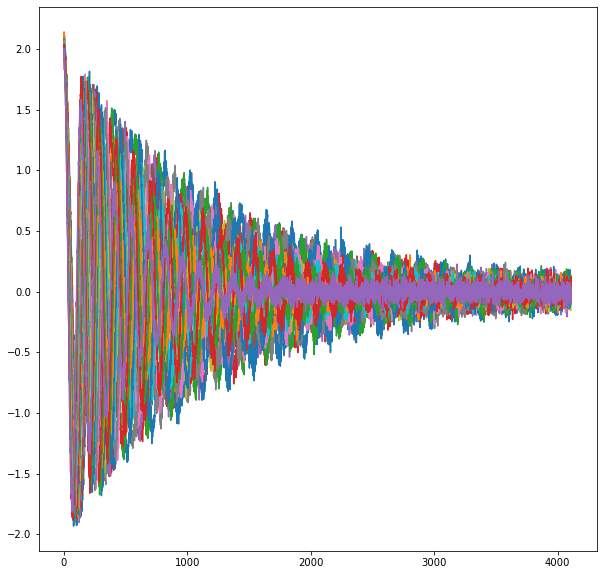

In [17]:
#Plot the transposed data
plt.plot(d.T);

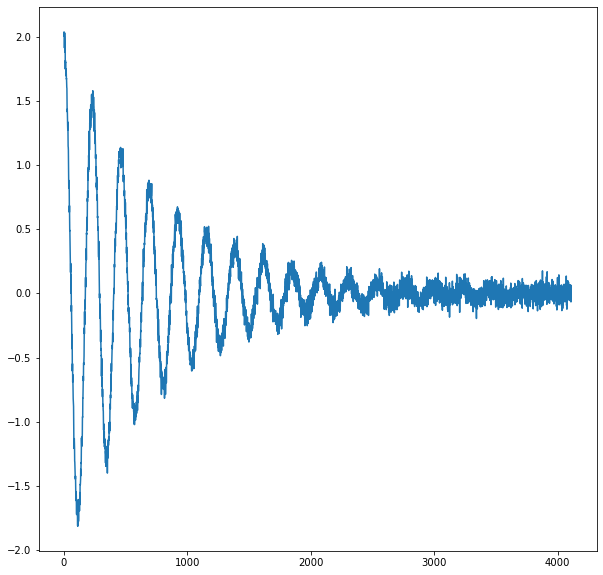

In [19]:
m =d[6]
plt.plot(m);

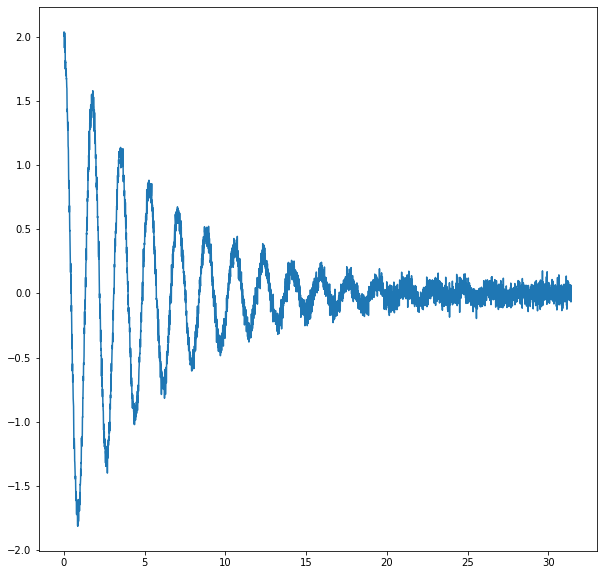

In [22]:
fig, ax = plt.subplots()
ax.plot(m.time, m);

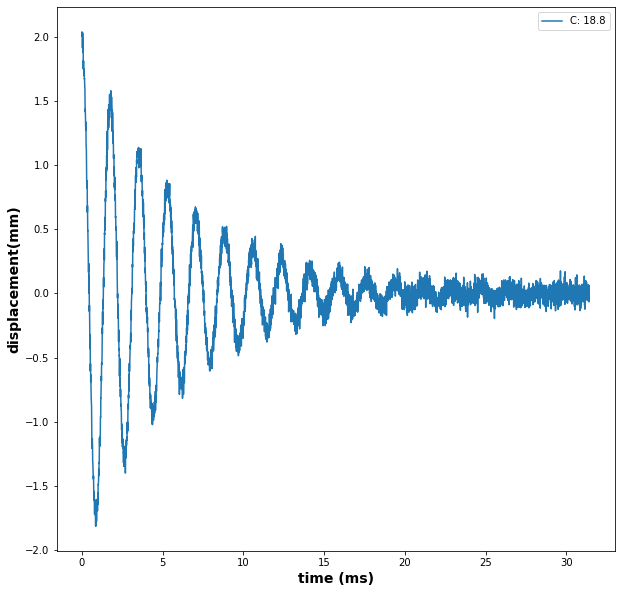

In [27]:
d = get_data()
m = d[6]
ctrl = float(m.control)
fig, ax = plt.subplots()
ax.plot(m.time, m, label = f"C: {ctrl:.1f}")
ax.legend()
ax.set_xlabel("time (ms)")
ax.set_ylabel("displacement(mm)");

In [42]:
def plot_one(ax, m, offset = 0):
    ctrl = float(m.control)
    ln, = ax.plot(m.time, m+offset, label=f"C: {ctrl:.1f}")
    plt.legend()


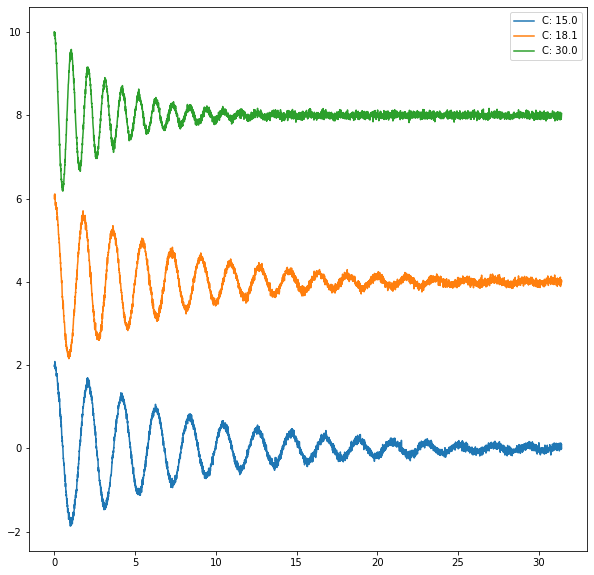

In [43]:
fig, ax = plt.subplots()
plot_one(ax, d[0], offset = 0)
plot_one(ax, d[5], offset = 4)
plot_one(ax, d[-1], offset = 8)

In [74]:
fit_vals = fit(m)


In [75]:
fit_vals

Params(A=1.9956203466935463, zeta=0.04663211683493438, omega=3.5619732375994815, phi=1.5715891209681492)

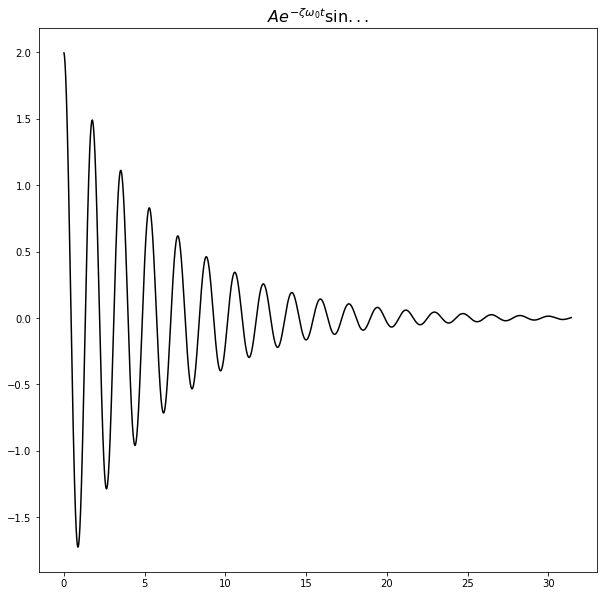

In [72]:
fig, ax = plt.subplots()
ax.plot(m.time, fit_vals.sample(m.time), label=fit_vals._repr_latex_(), color='k')
plt.legend()
plt.set_xlabel('time (ns)')
plt.set_ylabel('')
ax.set_title(r"$A e^{-\zeta\omega_0t}\sin...$");#,usetex=True);

In [97]:
def plot_one(ax, m, fv, offset=0):
    t = m.coords['time']
    z = m.values
    control= float(m.coords['control'])
    (ln,) = ax.plot(t, z + offset, label = f'C: {control:.1f}')
    (fit,) = ax.plot(t, fv.sample(t) + offset)
    ann = ax.annotate(f'$\zeta = {fit_vals.zeta:.2g}$ , $\\omega_0={fit_vals.omega:.2f}$',
                     xy = (0.95, offset + 0.5),
                     xycoords=ax.get_yaxis_transform(),
                     ha='right',
                     va='bottom',)
    return{"raw": ln, "fit": fit, "annotation": ann}

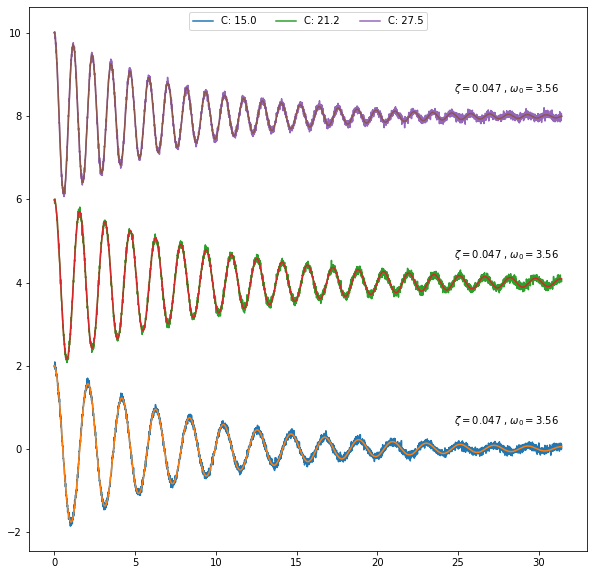

In [104]:
fig, ax = plt.subplots()
plot_one(ax, d[0], fit(d[0]), offset=0)
plot_one(ax, d[10], fit(d[10]), offset=4)
plot_one(ax, d[20], fit(d[20]), offset=8);
ax.legend(ncol=3, loc="upper center");

## Examples

make a plot of the deltiod curve defined by:

$x = 2 cos \theta + cos 2\theta$

$y = 2 sin\theta - sin 2\theta$

for theta between 0 and 2$\pi$, plot y(x)

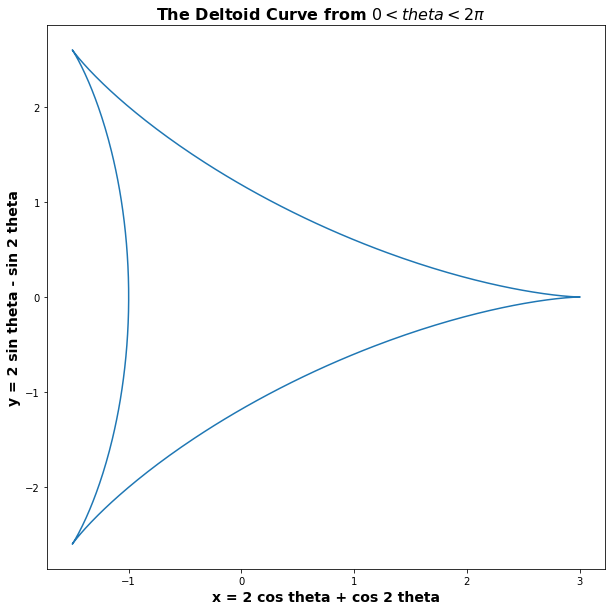

In [17]:
theta = np.arange(0, 2*np.pi, .01)
x = (2*np.cos(theta)) + (np.cos(2*theta))
y = (2*np.sin(theta)) - (np.sin(2*theta))
plt.plot(x,y)
plt.title('The Deltoid Curve from $ 0 < theta < 2 \pi$   ')
plt.xlabel('x = 2 cos theta + cos 2 theta')
plt.ylabel('y = 2 sin theta - sin 2 theta');